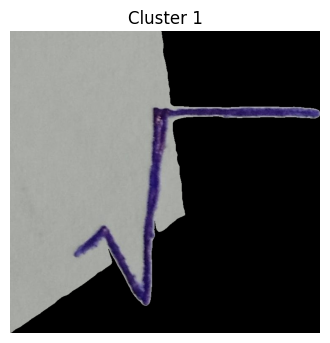

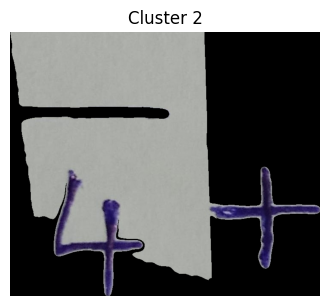

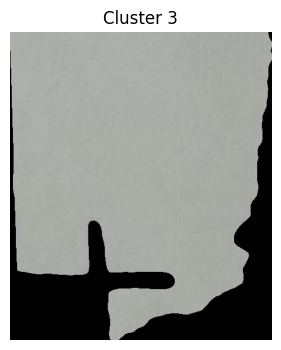

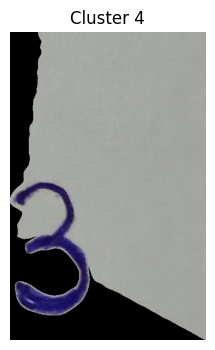

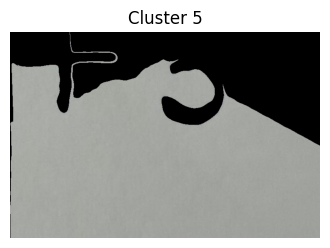

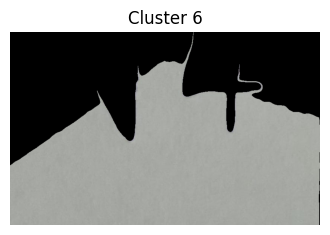

In [22]:
from skimage.segmentation import slic, mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

def count_character_pixels(image, segments):
    character_pixel_counts = {}
    
    for segment_label in np.unique(segments):
        mask = segments == segment_label
        character_pixel_counts[segment_label] = np.count_nonzero(image[mask])
    
    return character_pixel_counts

def mask_text_clusters(image, segments, character_pixel_counts, threshold=50):
    masked_clusters = []
    
    for segment_label, count in character_pixel_counts.items():
        if count > threshold:
            mask = segments == segment_label
            masked_clusters.append(mask)
    
    return masked_clusters

def crop_and_print_clusters(image, masked_clusters):
    for i, mask in enumerate(masked_clusters):
        masked_image = np.copy(image)
        masked_image[~mask] = 0
        
        # Find bounding box coordinates
        rows, cols = np.where(mask)
        min_row, max_row = np.min(rows), np.max(rows)
        min_col, max_col = np.min(cols), np.max(cols)
        
        # Crop the masked cluster
        cropped_cluster = masked_image[min_row:max_row, min_col:max_col]
        
        # Print the cropped cluster
        plt.figure(figsize=(4, 4))
        plt.imshow(cropped_cluster)
        plt.axis('off')
        plt.title(f'Cluster {i+1}')
        plt.show()

img_path = "/home/bcca/Desktop/Soham/DL Course Project/Handwritten-Equation-Solver/test_data/18.jpeg"
img = io.imread(img_path)[:,:,:3]

# Load the image and convert it to a floating point data type
image = img_as_float(img)

# Loop over the number of segments
# for numSegments in (10, 20, 30, 40):
numSegments = 8

segments = slic(image, n_segments=numSegments, sigma=5)

# Count character pixels in each segment
character_pixel_counts = count_character_pixels(image, segments)

# Mask clusters containing text
masked_clusters = mask_text_clusters(image, segments, character_pixel_counts)

# Crop and print each masked cluster individually
crop_and_print_clusters(image, masked_clusters)
